In [83]:
import pandas as pd
import numpy as np

## Pandas作业一

In [ ]:
# 1.建立一个以 2019 年每一天为索引，值为随机数的 Series，由变量t接收
days=pd.date_range("20190101","20191231")
values=np.random.randint(0,1000,365)
t=pd.Series(values)
t.index=days
# 2.统计t 中每一个周三对应值的和, 统计t中每个月值的平均值

In [241]:
users= pd.read_csv("../../作业/users.csv",sep='|',index_col=0)
# print(users.head(15))
# 2.以occupation分组，求每一种职业所有用户的平均年龄；
users.groupby("occupation")['age'].mean()
# 3.求每一种职业男性的占比，作为新的一列(male_pct)添加到数据集中,并按照从低到高的顺序排列；
# male_pct=users.groupby("occupation")['gender'].value_counts()/users.groupby("occupation")['gender'].count()
all_M= users.loc[users['gender']=='M',['gender','occupation']]
male_pct=all_M.groupby('occupation')['gender'].value_counts()/users.groupby("occupation")['gender'].count()
male_pct
# 4、获取每一种职业对应的最大和最小的用户年龄
maxAges= users.groupby("occupation")['age'].max()
minAges=users.groupby("occupation")['age'].min()
maxAges
minAges

occupation     gender
administrator  M         0.544304
artist         M         0.535714
doctor         M         1.000000
educator       M         0.726316
engineer       M         0.970149
entertainment  M         0.888889
executive      M         0.906250
healthcare     M         0.312500
homemaker      M         0.142857
lawyer         M         0.833333
librarian      M         0.431373
marketing      M         0.615385
none           M         0.555556
other          M         0.657143
programmer     M         0.909091
retired        M         0.928571
salesman       M         0.750000
scientist      M         0.903226
student        M         0.693878
technician     M         0.962963
writer         M         0.577778
Name: gender, dtype: float64

## Pandas作业二

In [387]:
# 1.导入数据并赋值给变量 chipo(chipotle.csv)
chipo=pd.read_csv("../../作业/chipotle/chipotle.csv",delimiter="\t")
# chipo
# 2.计算出有多少商品大于10美元（去除列数据中特殊字符）
# a= chipo.loc[:,'item_price']
# def f1(x):
#     return x.split('$')[1]
# b=chipo.loc[:,'item_price'].apply(f1)
# chipo.loc[:,'item_price']=b
# def f2(y):
#     i = False
#     if float(y) >=10:
#         i=True
#     return i
# c=chipo['item_price'].apply(f2)
# chipo[c]['item_price'].count()
# chipo
# 3.每个项目的价格是多少？[指定列去重，筛选，排序](如果存在多个价格，选择出现最高价格)	
# chipo.groupby("item_name")['item_price'].max()
# 4.在所有商品订单中 最贵商品的数量（quantity）是多少？
# index=chipo['item_price'].sort_values(ascending=False).head(1).index.values[0]
# chipo.loc[index,'quantity']
# 5.商品订购单中，商品 Veggie Salad Bowl 的订单数目？
# chipo[chipo['item_name']=="Veggie Salad Bowl"].count()
# 6. 在所有订单中，购买商品Canned Soda数量大于1的订单数有几条?


ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


## Matplotlib模块作业

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [11]:
#解决中文乱码问题
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

## 1.航班乘客变化分析:分析年度乘客总量变化情况（折线图）

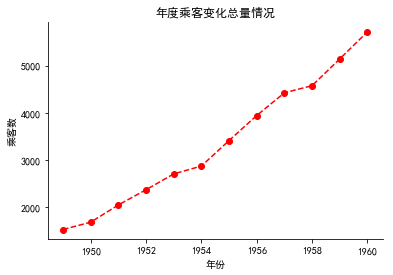

In [5]:
data=sns.load_dataset("flights")
# data
year=data.groupby('year').sum()
index=year.index
plt.plot(index,year,'ro--')
plt.xlabel("年份")
plt.ylabel("乘客数")
plt.title("年度乘客变化总量情况")
ax=plt.gca() #获取当前坐标轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

## 2.航班乘客变化分析: 分析乘客在一年中各月份的分布（柱状图）

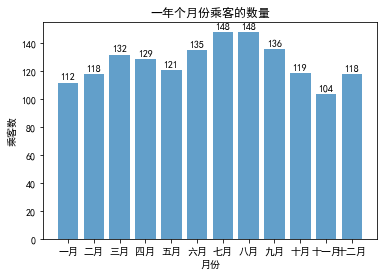

In [6]:
data_1949=data.loc[data['year']==1949]
month=['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']
passengers=data_1949['passengers']
plt.bar(month,passengers,alpha=0.7)
plt.xlabel("月份")
plt.ylabel("乘客数")
plt.title("一年个月份乘客的数量")

for i in range(len(month)):
    plt.text(i-0.3,passengers[i]+2,passengers[i])
plt.show()

## 3.鸢尾花花型尺寸分析：萼片（sepal）和花瓣（petal）的大小关系（散点图）

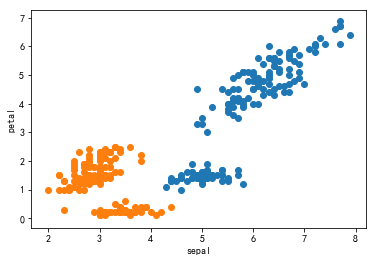

In [7]:
data=sns.load_dataset("iris")
sepal_length=data['sepal_length']
sepal_width=data['sepal_width']
petal_length=data['petal_length']
petal_width=data['petal_width']
plt.scatter(sepal_length,petal_length)
plt.scatter(sepal_width,petal_width)
plt.xlabel("sepal")
plt.ylabel("petal")
plt.show()

## 4.鸢尾花花型尺寸分析：不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [ ]:
species_obj=data.groupby('species')['sepal_length'].mean()
species_obj

In [12]:
data=sns.load_dataset("tips")
data

EmptyDataError: No columns to parse from file